In [1]:
path = r'./'

In [32]:
import re
import time
import datetime
import pickle
import pandas as pd
import numpy as np
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import naive_bayes
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
df_predict = pd.read_csv(path+"predict_data_Bagging.csv")

In [5]:
display(df_predict)

,predict,timestamp
0,1.0,2020-03-12 01:41:00
1,0.0,2020-03-12 01:41:00
2,1.0,2020-03-12 01:41:00
3,1.0,2020-03-12 01:41:00
4,1.0,2020-03-12 01:40:00
...,...,...
3112102,1.0,2020-02-13 16:58:00
3112103,1.0,2020-02-13 16:58:00
3112104,1.0,2020-02-13 16:58:00
3112105,1.0,2020-02-13 16:58:00


In [6]:
df_predict["timestamp"] = pd.to_datetime(df_predict["timestamp"])
df_predict["date"] = df_predict["timestamp"].dt.date

In [59]:
df_everyday = pd.DataFrame(df_predict.groupby("date")["predict"].mean())
df_everyday = df_everyday[datetime.date(2019,9,1):] # filter to the time near to COVID-19 start
display(df_everyday)

,predict
date,
2019-09-02,0.800000
2019-09-03,0.659091
2019-09-04,0.557740
2019-09-05,0.805556
2019-09-06,0.839286
...,...
2020-03-23,0.784090
2020-03-24,0.769447
2020-03-25,0.802820


<Figure size 3200x6400 with 0 Axes>

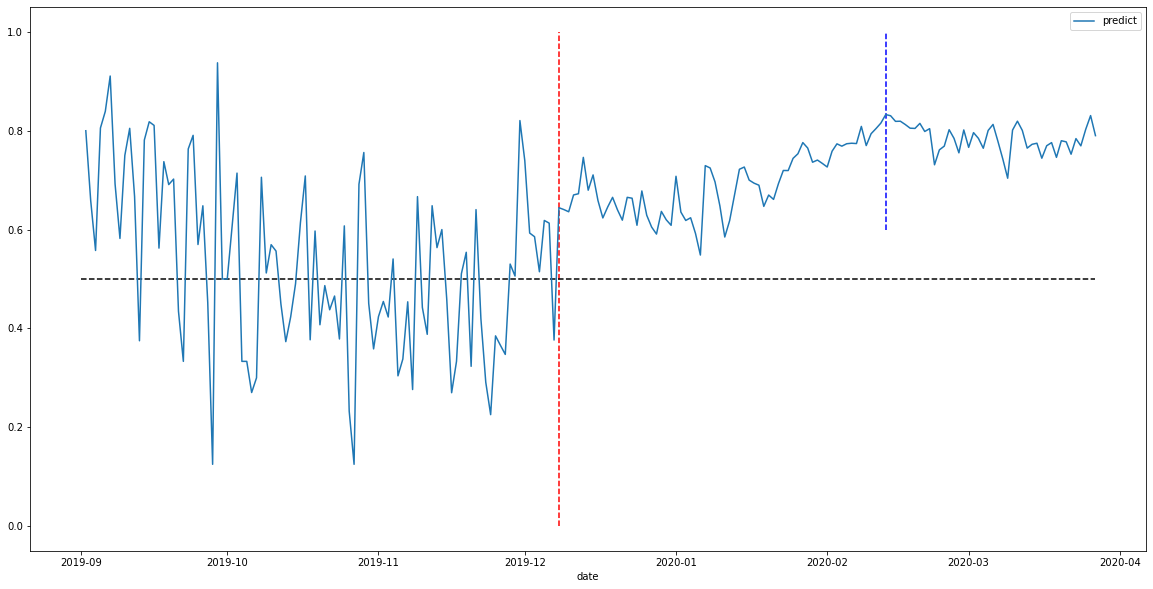

In [65]:
plt.figure(figsize = (10,20), dpi = 320)
ax = df_everyday[datetime.date(2019,9,1):].plot(figsize = (20,10))
ax.vlines(datetime.date(2019,12,8),0,1, colors = "r", linestyles = "dashed")
ax.hlines(0.5,datetime.date(2019,9,1),datetime.date(2020,3,27), colors = "black", linestyles = "dashed")
ax.vlines(datetime.date(2020,2,13),0.6,1, colors = "b", linestyles = "dashed")
plt.savefig('weibo_senti_covid.png', dpi = 320)